# PGC - Coleta de Dados e Criação da Base de Dados

In [1]:
import re
import cv2
import time
import spacy

import igraph as ig
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

regex = r"[-'a-zA-ZÀ-ÖØ-öø-ÿ0-9]+"

Abrindo o corpus e armazenando o conteúdo completo em *content* e as linhas em *paragraphs*.

In [2]:
fileName = "../Dados/corpus-textos-DC-01-10.txt"

document = open(fileName,'r', encoding='utf-8')
content  = document.read()

document = open(fileName,'r', encoding='utf-8')
paragraphs = document.readlines()

words = re.findall(regex, content)

print (f"Quantidade de palavras: {len(words)}") 

Quantidade de palavras: 115525


Removendo parágrafos em branco. Esses parágrafos foram adicionados ao *corpus* apenas para que ficasse mais fácil de ler.

In [3]:
for paragraph in paragraphs:
    if paragraph == "\n":
        paragraphs.remove(paragraph)

In [4]:
print(f"Quantidade de parágrafos de conteúdo: {len(paragraphs)}")

Quantidade de parágrafos de conteúdo: 2224


Quantas palavras diferentes estão presentes no *corpus*? Quantas vezes cada uma dessas palavras aparece no *corpus*?

In [5]:
frequencies = dict([])
for w in words:
    w = w.lower()
    if w not in frequencies:
        frequencies[w] = 0
    frequencies[w] += 1
print (f"Tamanho do vocabulário: {len(frequencies)}")

Tamanho do vocabulário: 14932


In [6]:
fs = sorted(frequencies, key=frequencies.get, reverse=True)
print("Freq\t -\t Palavra")
for i in range(0,20):
    print (f"{frequencies[fs[i]]}\t -\t {fs[i]}")

Freq	 -	 Palavra
5600	 -	 de
3571	 -	 a
3533	 -	 e
3095	 -	 que
2864	 -	 o
1803	 -	 em
1586	 -	 da
1568	 -	 do
1448	 -	 é
1417	 -	 um
1284	 -	 para
1161	 -	 com
1151	 -	 uma
983	 -	 os
882	 -	 por
880	 -	 no
869	 -	 como
842	 -	 não
824	 -	 na
738	 -	 se


Quantidade e frequência das palavras após a remoção de *stopwords*.

In [7]:
stopwordsPTfile = open("../Dados/stopwords-pt.txt",'r', encoding='utf-8')
stopwords = set([]) 
for s in stopwordsPTfile.readlines():
    stopwords.add(s.strip().lower())
    
frequencies = dict([])
for w in words:
    w = w.lower()
    if w not in stopwords:
        if w not in frequencies:
            frequencies[w] = 0
        frequencies[w] += 1
        
print (f"Tamanho do vocabulário (sem stopwords): {len(frequencies)}")

Tamanho do vocabulário (sem stopwords): 14606


In [8]:
fs = sorted(frequencies, key=frequencies.get, reverse=True)
print("Freq\t -\t Palavra")
for i in range(0,20):
    print (f"{frequencies[fs[i]]}\t -\t {fs[i]}")

Freq	 -	 Palavra
239	 -	 ciência
231	 -	 água
142	 -	 tempo
125	 -	 exemplo
125	 -	 luz
115	 -	 vida
114	 -	 mundo
112	 -	 história
105	 -	 pesquisa
104	 -	 química
103	 -	 cientistas
95	 -	 animais
93	 -	 brasil
90	 -	 terra
87	 -	 física
86	 -	 estudos
86	 -	 moléculas
84	 -	 vírus
80	 -	 científica
75	 -	 corpo


In [9]:
textos_por_palavra = []
palavras = []

for word in words:
    if(word != "---"):
        palavras.append(word)
    else:
        textos_por_palavra.append(palavras)
        palavras = []

In [10]:
textos_por_paragrafo = []
paragrafos = []

for paragraph in paragraphs:
    if(paragraph != "---\n"):
        paragrafos.append(paragraph[:-1])
    else:
        textos_por_paragrafo.append(paragrafos)
        paragrafos = []

In [11]:
i = 154

Texto *i* como um vetor de palavras.

In [12]:
print(textos_por_palavra[i])

['Qual', 'a', 'diferença', 'entre', 'rinite', 'e', 'sinusite', 'acessibilidade', 'Ilustração', 'de', 'um', 'homem', 'espirrando', 'em', 'um', 'lenço', 'Existem', 'duas', 'ites', 'que', 'acometem', 'nossas', 'vias', 'aéreas', 'no', 'inverno', 'e', 'no', 'período', 'de', 'ar', 'seco', 'são', 'elas', 'sinusite', 'e', 'rinite', 'Estas', 'duas', 'inflamações', 'podem', 'se', 'manifestar', 'sempre', 'que', 'a', 'pessoa', 'tiver', 'contato', 'com', 'algum', 'patógeno', 'ou', 'com', 'substâncias', 'alergênicas', 'Elas', 'podem', 'ocorrer', 'juntas', 'ou', 'isoladamente', 'e', 'em', 'muitos', 'casos', 'a', 'rinite', 'pode', 'acarretar', 'a', 'sinusite', 'Mas', 'afinal', 'você', 'sabe', 'diferenciar', 'as', 'duas', 'A', 'rinite', 'é', 'uma', 'inflamação', 'que', 'acomete', 'as', 'mucosas', 'do', 'nariz', 'e', 'essa', 'inflamação', 'ocorre', 'por', 'conta', 'de', 'infecções', 'virais', 'ou', 'de', 'alergias', 'A', 'rinite', 'alérgica', 'é', 'mais', 'comum', 'e', 'é', 'provocada', 'por', 'partícul

Texto *i* como um vetor de *strings* em que cada *string* é um parágrafo do texto.

In [13]:
print(textos_por_paragrafo[i])

['Qual a diferença entre rinite e sinusite?', '#acessibilidade Ilustração de um homem espirrando em um lenço.', 'Existem duas “ites” que acometem nossas vias aéreas no inverno e no período de ar seco, são elas: sinusite e rinite. Estas duas inflamações podem se manifestar sempre que a pessoa tiver contato com algum patógeno ou com substâncias alergênicas. Elas podem ocorrer juntas ou isoladamente, e em muitos casos a rinite pode acarretar a sinusite. Mas, afinal, você sabe diferenciar as duas?', 'A rinite é uma inflamação que acomete as mucosas do nariz, e essa inflamação ocorre por conta de infecções virais ou de alergias. A rinite alérgica é mais comum e é provocada por partículas estranhas ao nosso corpo como pelos de animais e poeira. Os sintomas geralmente são coceira no nariz, coriza, obstrução nasal, espirro, dor de cabeça e nos olhos. Os tratamentos envolvem antialérgicos, vacinas contra alergias e corticoides.', 'Já a sinusite é uma inflamação nas mucosas dos seios da face, qu

## Criação dos atributos

Criação dos atributos tamanho do título, média de caracteres nos parágrafos, número de palavras e número de parágrafos.

In [14]:
tamanhoTitulo = []
for i in range (len(textos_por_paragrafo)):
    tamanhoTitulo.append(len(textos_por_paragrafo[i][0]))

print("Tamanho do título:\n",tamanhoTitulo)

Tamanho do título:
 [40, 22, 65, 20, 56, 32, 36, 52, 31, 71, 46, 21, 37, 29, 37, 39, 54, 24, 14, 25, 24, 40, 23, 40, 70, 45, 32, 22, 36, 33, 25, 26, 52, 63, 36, 45, 51, 18, 34, 11, 74, 35, 20, 22, 15, 64, 23, 40, 37, 42, 52, 78, 48, 23, 71, 7, 28, 27, 44, 7, 27, 26, 29, 46, 57, 42, 53, 40, 29, 52, 45, 68, 45, 74, 54, 33, 36, 56, 45, 69, 25, 32, 27, 51, 36, 46, 42, 27, 66, 43, 42, 78, 60, 38, 22, 61, 38, 25, 91, 37, 52, 65, 49, 31, 68, 61, 37, 31, 55, 30, 34, 43, 21, 26, 37, 22, 51, 59, 71, 40, 57, 30, 34, 48, 51, 39, 34, 19, 20, 62, 40, 40, 83, 76, 48, 20, 29, 43, 49, 43, 66, 36, 42, 74, 70, 36, 48, 46, 35, 63, 17, 30, 38, 42, 41]


In [15]:
mediaParagrafos = []
#tamanhoParagrafos = []
aux = []
#maior = 0
#txtMaior = 0
#parMaior = 0

for i in range (len(textos_por_paragrafo)):
    for j in range (1,len(textos_por_paragrafo[i])-1):
        aux.append(len(textos_por_paragrafo[i][j]))
        
        #if len(textos_por_paragrafo[i][j]) > maior:
        #    maior = len(textos_por_paragrafo[i][j])
        #    
        #    txtMaior = i
        #    parMaior = j
    
    mediaParagrafos.append(round(sum(aux)/len(aux)))
    #tamanhoParagrafos.append(aux)
    aux = []

#print("Maior parágrafo tem",len(textos_por_paragrafo[txtMaior][parMaior]),
#      "caracteres\nTexto:",textos_por_paragrafo[txtMaior][0],
#      "\nParágrafo:\n\t",textos_por_paragrafo[txtMaior][parMaior])

print("Média de parágrafos:\n", mediaParagrafos)

Média de parágrafos:
 [308, 204, 180, 514, 340, 332, 472, 384, 478, 378, 265, 337, 440, 530, 342, 335, 464, 219, 518, 313, 563, 247, 301, 539, 584, 355, 451, 249, 506, 419, 387, 436, 212, 304, 612, 570, 482, 476, 562, 589, 294, 353, 316, 443, 571, 496, 555, 421, 474, 504, 184, 434, 240, 484, 358, 636, 290, 388, 240, 218, 242, 466, 476, 547, 406, 358, 599, 302, 545, 300, 540, 655, 608, 559, 567, 423, 472, 303, 391, 356, 532, 424, 398, 368, 672, 428, 425, 395, 432, 183, 645, 267, 460, 324, 309, 788, 602, 684, 294, 274, 430, 246, 460, 435, 685, 426, 460, 431, 321, 293, 342, 689, 408, 416, 171, 615, 460, 234, 809, 377, 976, 313, 477, 571, 316, 350, 392, 811, 646, 739, 645, 480, 348, 760, 404, 514, 553, 443, 519, 287, 627, 462, 490, 146, 690, 317, 249, 340, 722, 367, 511, 632, 349, 367, 320]


In [16]:
nPalavras = []
nParagrafos = []

for i in range (len(textos_por_palavra)):
    nPalavras.append(len(textos_por_palavra[i]))
    nParagrafos.append(len(textos_por_paragrafo[i]))
    
print("Número de palavras\n", nPalavras)
print("\nNúmero de parágrafos\n", nParagrafos)

Número de palavras
 [345, 532, 913, 322, 557, 400, 400, 345, 577, 1129, 439, 311, 300, 516, 345, 449, 341, 799, 609, 714, 612, 375, 236, 438, 766, 381, 371, 1757, 330, 339, 292, 355, 203, 1052, 619, 363, 435, 487, 426, 678, 584, 529, 271, 691, 1079, 335, 1044, 583, 511, 668, 1031, 631, 348, 678, 342, 855, 768, 913, 515, 327, 389, 1702, 1153, 1124, 758, 947, 392, 443, 706, 1324, 810, 851, 816, 472, 697, 367, 406, 613, 973, 737, 576, 1228, 1441, 1452, 1252, 1249, 1309, 533, 1171, 651, 1341, 731, 1200, 687, 782, 749, 580, 1152, 749, 552, 1083, 685, 756, 1236, 779, 934, 554, 606, 564, 1219, 437, 1011, 987, 563, 788, 652, 608, 759, 954, 608, 1219, 886, 812, 835, 778, 443, 618, 654, 1048, 1011, 713, 917, 547, 1111, 788, 708, 948, 892, 1097, 673, 2046, 754, 1978, 724, 883, 965, 756, 803, 1026, 903, 926, 750, 667, 761, 321]

Número de parágrafos
 [9, 18, 33, 6, 13, 9, 7, 7, 9, 20, 11, 7, 7, 8, 8, 10, 7, 23, 9, 16, 9, 11, 7, 7, 10, 8, 7, 46, 6, 7, 7, 7, 8, 23, 8, 6, 8, 8, 7, 10, 14, 11, 7, 11, 

Postagging para criação dos atributos 'numSub', 'numAdj', 'numVrb', 'numNEs', 'numDet', 'numConj', 'numAdv', 'numAdp' e 'numNum'.

In [17]:
postagging = spacy.load('pt_core_news_lg')

Exemplo para o título do texto 117.

In [18]:
parsedData = postagging(textos_por_paragrafo[117][0])
print(parsedData,"\n")

for j,word in enumerate(parsedData):
    print("Palavra:",word.text,"\nPostag:",word.pos_,"\n")

O Paradoxo de Simpson te mostra que nem tudo é o que parece 

Palavra: O 
Postag: DET 

Palavra: Paradoxo 
Postag: PROPN 

Palavra: de 
Postag: ADP 

Palavra: Simpson 
Postag: PROPN 

Palavra: te 
Postag: PRON 

Palavra: mostra 
Postag: VERB 

Palavra: que 
Postag: SCONJ 

Palavra: nem 
Postag: CCONJ 

Palavra: tudo 
Postag: PRON 

Palavra: é 
Postag: AUX 

Palavra: o 
Postag: PRON 

Palavra: que 
Postag: PRON 

Palavra: parece 
Postag: VERB 



In [19]:
for word in parsedData:
    if word.ent_type_:
        print(word.text, word.ent_type_)

Paradoxo MISC
de MISC
Simpson MISC


In [20]:
t=time.perf_counter()

nNounsTotal = []
nAdjTotal = []
nVerbTotal = []
nNesTotal = []
nDetTotal = []
nConjTotal = []
nAdvTotal = []
nAdpTotal = []
nNumTotal = []
palavras_desconhecidas = []

for k in range (len(textos_por_paragrafo)):
    nNouns = 0
    nAdj = 0
    nVerb = 0
    nNes = 0
    nDet = 0
    nConj = 0
    nAdv = 0
    nAdp = 0
    nNum = 0
    
    for l in range (len(textos_por_paragrafo[k])):        
        parsedData = postagging(textos_por_paragrafo[k][l])
        
        for j,palavra in enumerate(parsedData):
            tag = palavra.pos_
            if tag in ["NOUN","PROPN"]:
                nNouns += 1
            elif tag in ["ADJ"]:
                nAdj += 1
            elif tag in ["VERB"]:
                nVerb += 1
            elif tag in ["DET"]:
                nDet += 1
            elif tag in ["CONJ","CCONJ"]:
                nConj += 1
            elif tag in ["ADV"]:
                nAdv += 1
            elif tag in ["NUM"]:
                nNum += 1
            elif tag in ["ADP"]:
                nAdp += 1
            elif tag in ["X"]:
                palavras_desconhecidas.append(palavra)
            if palavra.ent_type_:
                nNes += 1

    nNounsTotal.append(round(nNouns/nPalavras[k],4))
    nAdjTotal.append(round(nAdj/nPalavras[k],4))
    nVerbTotal.append(round(nVerb/nPalavras[k],4))
    nNesTotal.append(round(nNes/nPalavras[k],4))
    nDetTotal.append(round(nDet/nPalavras[k],4))
    nConjTotal.append(round(nConj/nPalavras[k],4))
    nAdvTotal.append(round(nAdv/nPalavras[k],4))
    nAdpTotal.append(round(nAdp/nPalavras[k],4))
    nNumTotal.append(round(nNum/nPalavras[k],4))

print(round(time.perf_counter()-t,3), "segundos")

46.64 segundos


In [21]:
print("Substantivos (%):\n",nNounsTotal)
print("\nAdjetivos (%):\n",nAdjTotal)
print("\nVerbos (%):\n",nVerbTotal)
print("\nEntidades nomeadas (%):\n",nNesTotal)
print("\nDeterminantes (%):\n",nDetTotal)
print("\nConjunções (%):\n",nConjTotal)
print("\nAdvérbios (%):\n",nAdvTotal)
print("\nAdposições (%):\n",nAdpTotal)
print("\nNumerais (%):\n",nNumTotal)
print("\nPalavras desconhecidas:\n",palavras_desconhecidas)

Substantivos (%):
 [0.3362, 0.3684, 0.3395, 0.3758, 0.4022, 0.2825, 0.36, 0.2957, 0.3016, 0.3198, 0.3303, 0.2765, 0.3333, 0.345, 0.2812, 0.3007, 0.305, 0.2215, 0.3547, 0.3515, 0.3415, 0.2773, 0.3305, 0.3014, 0.3133, 0.2966, 0.3801, 0.2977, 0.3, 0.292, 0.3699, 0.2901, 0.3695, 0.2557, 0.294, 0.3058, 0.3954, 0.306, 0.3803, 0.3378, 0.4092, 0.3138, 0.3358, 0.2836, 0.3216, 0.3403, 0.2912, 0.295, 0.2916, 0.253, 0.3385, 0.3439, 0.3534, 0.2625, 0.3363, 0.3977, 0.3529, 0.3713, 0.301, 0.3089, 0.2956, 0.2867, 0.2663, 0.3158, 0.2889, 0.32, 0.3061, 0.3002, 0.3272, 0.2636, 0.3049, 0.342, 0.2794, 0.2924, 0.33, 0.2943, 0.3005, 0.3002, 0.3094, 0.3229, 0.3229, 0.3779, 0.3046, 0.3815, 0.2564, 0.3187, 0.3163, 0.3265, 0.2886, 0.2627, 0.3162, 0.342, 0.3317, 0.3362, 0.2749, 0.3311, 0.3534, 0.2535, 0.2804, 0.2736, 0.2853, 0.3401, 0.3479, 0.3018, 0.2991, 0.3137, 0.2924, 0.3432, 0.3067, 0.3175, 0.2494, 0.2572, 0.2948, 0.3108, 0.1992, 0.3021, 0.3191, 0.2701, 0.2642, 0.3273, 0.2855, 0.281, 0.2796, 0.2994, 0.2828, 

 [0.0464, 0.0169, 0.0482, 0.0373, 0.0305, 0.0475, 0.03, 0.0377, 0.0416, 0.0576, 0.0547, 0.045, 0.03, 0.0446, 0.0638, 0.0379, 0.0411, 0.0851, 0.0525, 0.0518, 0.0523, 0.0507, 0.0212, 0.0525, 0.0601, 0.0577, 0.0216, 0.0535, 0.0333, 0.059, 0.0582, 0.0592, 0.0788, 0.0656, 0.0517, 0.0523, 0.023, 0.0657, 0.0399, 0.0546, 0.0223, 0.0624, 0.0258, 0.0535, 0.0426, 0.0328, 0.0479, 0.0429, 0.0548, 0.0868, 0.0495, 0.0491, 0.0345, 0.0649, 0.0614, 0.0152, 0.0312, 0.034, 0.066, 0.0398, 0.0823, 0.077, 0.0555, 0.04, 0.0422, 0.0623, 0.0663, 0.0609, 0.0496, 0.071, 0.0605, 0.0329, 0.0858, 0.0614, 0.0603, 0.0708, 0.0714, 0.0538, 0.0719, 0.0543, 0.0469, 0.0309, 0.0618, 0.0461, 0.0775, 0.0464, 0.0581, 0.0394, 0.0581, 0.0783, 0.0522, 0.0698, 0.0375, 0.0451, 0.0639, 0.0561, 0.0466, 0.0755, 0.0614, 0.0725, 0.0609, 0.0496, 0.0529, 0.0542, 0.0591, 0.0385, 0.065, 0.0314, 0.055, 0.0509, 0.0824, 0.0534, 0.0466, 0.0409, 0.0647, 0.0629, 0.0526, 0.0487, 0.086, 0.0444, 0.0599, 0.07, 0.069, 0.0503, 0.0476, 0.0361, 0.0275, 0

Criação do atributo 'pergunta'.

In [22]:
titulos = []
for i in range (len(textos_por_paragrafo)):
    titulos.append(textos_por_paragrafo[i][0])
    
pergunta = []
for titulo in titulos:
    if(titulo.find('?') != -1):
        pergunta.append(1)
    else:
        pergunta.append(0)

print("Há uma pergunta no título?\n", pergunta)

Há uma pergunta no título?
 [1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]


Visualizando todos os títulos e todos os autores.

In [23]:
for i in range (len(textos_por_paragrafo)):
    print(textos_por_paragrafo[i][0])

Livro - Professor, para que estudo isso?
Coleção Contém Química
O que é um podcast? É tipo rádio? Como faço para começar a ouvir?
Nojo no mundo animal
Prêmio Nobel 2017 – Microscopia Eletrônica com Criogenia
Que seja eterno enquanto dure...
O que dá cor aos fogos de artifício?
Por que café descafeinado tem gosto e aroma de café?
Arco-íris de sons? O que seria?
[ENTREVISTA] Água em Marte: os próximos passos para a pesquisa espacial
Lua de Sangue: entenda como funciona o Eclipse
Por que o céu é azul?
Estratégias de contracepção masculina
Os alquimistas estão chegando
E se acabássemos com o efeito estufa?
A ciência que você vê, mas não percebe!
Pílula anticoncepcional para o homem: é uma realidade?
Se sentindo um impostor?
O voo de Ícaro
O Roubo da Medalha Fields
Colesterol pode ser bom?
Números imaginários… Mas o quê? Por quê?
Viagra feminino existe?
O CO2 é o grande vilão do efeito estufa?
Crônica de uma tragédia anunciada: a morte assistida do Museu Nacional
O que as vacas têm a ver co

In [24]:
for i in range (len(textos_por_paragrafo)):
    print(textos_por_paragrafo[i][-1])

admin
admin
Marcelo Pena
Camilo Angelucci
Daniele Araújo
Camilo Angelucci
Ivanise Gaubeur, Naomi Akiba
Emily Takeuchi
Cassiano Aono
Renato Cunha
Manuela Rodrigues
Fábio Furlan
Carlos Alberto-Silva
Victoria Baptista Dias Miotto, Ronei Miotto
Janaína Garcia
Vanessa Verdade
Carlos Alberto-Silva
Marcelo Pena
Marcelo Leigui
Camilo Angelucci
Hugo Suffredini
Camila Vieira
Amedea Seabra
Janaína Garcia
Fabiana Rodrigues Costa Nunes
Janaína Garcia
Amedea Seabra
Marcelo Pena
Hugo Suffredini
Vanessa Verdade
Daniele Araújo
Naomi Akiba
Vanessa Verdade
Gloria Santucci
Attalya Felix
Hugo Suffredini
Daniele Araújo
Marcelo S. Caetano, Raquel Fornari
Carlos Alberto-Silva, Vanessa Verdade
Livia Seno Ferreira Camargo
Renato Cunha
Cassiano Aono
Fábio Furlan
Janaína Garcia
Marcelo Leigui
Fábio Furlan
Gabriela Dias, Michele Salvador
Hugo Suffredini, Paula Homem de Mello
Cassiano Aono
Vanessa Verdade
Renato Cunha
Daniele Araújo
Daniele Araújo
Felipe Cesar
Renato Cunha
Wesley Góis
Jhonathan Souza
Marcelo Pena
J

Criação do atributo 'refs' e criando um grafo para exibir as relações entre os textos.

In [26]:
col_list = ["Post","Área","Rel1","Rel2","Rel3"]
relacionados = pd.read_excel("../Dados/dataset-manual.xlsx", usecols=col_list)
relacionados.head()

,Post,Área,Rel1,Rel2,Rel3
0,"Livro – Professor, para que estudo isso?",Ciência,Coleção Contém Química,O que é um podcast? É tipo rádio? Como faço pa...,Qual o papel do professor universitário?
1,Coleção Contém Química,Química,"Livro – Professor, para que estudo isso?",O que é um podcast? É tipo rádio? Como faço pa...,A química dos sabores
2,O que é um podcast? É tipo rádio? Como faço pa...,Tecnologia,Coleção Contém Química,"Livro – Professor, para que estudo isso?","A ciência que você vê, mas não percebe!"
3,Nojo no mundo animal,Biologia,Coleção Contém Química,"Livro – Professor, para que estudo isso?",Que seja eterno enquanto dure…
4,Prêmio Nobel 2017 – Microscopia Eletrônica com...,Química,Coleção Contém Química,Prêmio Nobel em Medicina 2018 – Imunologia e C...,[Física e Química] Prêmio Nobel premia pesquis...


In [27]:
edges = []
    
for i in range (len(relacionados)):
    rel = []
    rel.append(list(relacionados[relacionados['Post'][i] == relacionados['Rel1']].index))
    rel.append(list(relacionados[relacionados['Post'][i] == relacionados['Rel2']].index))
    rel.append(list(relacionados[relacionados['Post'][i] == relacionados['Rel3']].index))

    for j in range (len(rel)):
        for k in range (len(rel[j])):
            edges.append([rel[j][k],i])
    
print("Arestas:\n", edges)

Arestas:
 [[1, 0], [8, 0], [15, 0], [19, 0], [2, 0], [3, 0], [7, 0], [10, 0], [21, 0], [24, 0], [34, 0], [13, 0], [20, 0], [47, 0], [48, 0], [0, 1], [2, 1], [3, 1], [4, 1], [7, 1], [10, 1], [20, 1], [34, 1], [13, 1], [23, 1], [28, 1], [48, 1], [50, 1], [112, 1], [25, 1], [85, 1], [153, 1], [0, 2], [1, 2], [17, 2], [110, 2], [8, 2], [27, 2], [81, 2], [109, 2], [5, 3], [16, 3], [148, 3], [19, 3], [76, 3], [40, 4], [30, 4], [36, 4], [41, 4], [90, 4], [12, 5], [33, 5], [3, 5], [16, 5], [19, 5], [135, 5], [42, 6], [8, 6], [15, 6], [73, 6], [11, 6], [31, 6], [56, 6], [87, 6], [108, 7], [22, 7], [11, 8], [13, 8], [73, 8], [127, 8], [18, 9], [31, 9], [55, 9], [143, 9], [43, 9], [38, 9], [40, 9], [61, 9], [11, 10], [18, 10], [55, 10], [83, 10], [26, 10], [69, 10], [103, 10], [45, 11], [87, 11], [127, 11], [6, 11], [26, 11], [31, 11], [15, 11], [18, 11], [23, 11], [42, 11], [43, 11], [22, 12], [16, 12], [70, 13], [17, 13], [24, 13], [23, 14], [25, 14], [39, 14], [66, 14], [100, 14], [17, 15], [2

In [28]:
g = ig.Graph(directed=True)
g.add_vertices(len(relacionados))

for i in range(len(g.vs)):
    g.vs[i]["id"] = i
    g.vs[i]["area"] = relacionados['Área'][i]
    g.vs[i]["label"] = str(i)

g.add_edges(edges)

In [29]:
print(f"Número de vértices no grafo: {g.vcount()}")
print(f"Número de arestas no grafo: {g.ecount()}")
print(f"Grau máximo no grafo: {g.maxdegree()}")

Número de vértices no grafo: 155
Número de arestas no grafo: 465
Grau máximo no grafo: 20


In [30]:
refs = []
#layers = []
for i in range (len(relacionados)):
    refs.append(len(g.neighbors(i, mode='IN')))
    #layers.append(abs(refs[i]-17))
print("Referências:\n", refs)
#print(layers)

Referências:
 [15, 17, 8, 5, 5, 6, 8, 2, 4, 8, 7, 11, 2, 3, 5, 15, 4, 6, 6, 5, 2, 5, 3, 5, 5, 2, 5, 11, 2, 5, 4, 6, 4, 6, 3, 7, 5, 3, 6, 6, 2, 4, 10, 7, 1, 3, 5, 5, 4, 1, 1, 4, 5, 7, 2, 5, 8, 6, 6, 5, 0, 3, 1, 4, 0, 3, 4, 2, 4, 3, 1, 0, 2, 3, 4, 4, 1, 3, 3, 3, 2, 0, 0, 1, 2, 0, 0, 5, 2, 4, 2, 1, 1, 5, 5, 1, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 3, 1, 3, 0, 2, 2, 1, 0, 2, 0, 1, 3, 0, 1, 0, 0, 5, 1, 5, 2, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0]


In [31]:
visual_style = {}
out_name = "../Imagens/graph.pdf"

color_dict = {"Biologia": "green",
              "Ciência": "red",
              "Química": "yellow",
              "Física": "blue",
              "História": "pink",
              "Medicina": "cyan",
              "Astronomia": "orange",
              "Atualidades": "brown",
              "Matemática": "olive",
              "Psicologia": "purple",
              "Tecnologia": "gray"}

#visual_style["layout"] = g.layout_sugiyama(layers=layers, hgap=100.0, vgap=2000.0)
#layout = g.layout_sugiyama(layers=layers, hgap=110, vgap=1000)
#layout_bounding_box = layout.bounding_box()
#layout.translate((-1*layout_bounding_box.left, -1*layout_bounding_box.top))
#layout_bounding_box = layout.bounding_box()
visual_style["bbox"] = (8000,4000)
visual_style["margin"] = 100
visual_style["vertex_size"] = 70
visual_style["vertex_label_size"] = 30
visual_style["edge_curved"] = True
visual_style["edge_widht"] = 2
edges_colors = []
for i in range (len(g.es)): edges_colors.append(g.vs[g.es[i].source]["area"])
visual_style["edge_color"] = [color_dict[area] for area in edges_colors]
visual_style["vertex_color"] = [color_dict[area] for area in g.vs["area"]]
visual_style["layout"] = g.layout_lgl()

#ig.plot(g, out_name, keep_aspect_ratio=True, layout=layout, bbox=layout_bounding_box, **visual_style);
ig.plot(g, out_name, **visual_style);

Exemplo de atributos para o texto *i*.

In [32]:
i = 149
print(f"Texto {i} - {textos_por_paragrafo[i][0][:-1]}")
print(f"Autor: {textos_por_paragrafo[i][-1][:-1]}")
print(f"Número de palavras: {nPalavras[i]}")
print(f"Número de parágrafos: {nParagrafos[i]}") ####### Título e Autor contam como parágrafos
print(f"Número de substantivos: {nNounsTotal[i]}")
print(f"Número de adjetivos: {nAdjTotal[i]}")
print(f"Número de verbos: {nVerbTotal[i]}")
print(f"Número de Entidades Nomeadas: {nNesTotal[i]}")
print(f"Número de Determinantes:",nDetTotal[i])
print(f"Número de Conjunções:",nConjTotal[i])
print(f"Número de Advérbios:",nAdvTotal[i])
print(f"Número de Adposições:",nAdpTotal[i])
print(f"Número de Numerais:",nNumTotal[i])
print(f"Tamanho médio dos parágrafos:",mediaParagrafos[i])
print(f"Número de caracteres do título:",tamanhoTitulo[i])
print(f"É uma pergunta?: {pergunta[i]}")
print(f"Vezes relacionado: {refs[i]}")

Texto 149 - Como saber a situação da sua cidade frente ao novo coronavírus
Autor: Marcelo Pen
Número de palavras: 903
Número de parágrafos: 16
Número de substantivos: 0.2802
Número de adjetivos: 0.0631
Número de verbos: 0.1274
Número de Entidades Nomeadas: 0.0875
Número de Determinantes: 0.1451
Número de Conjunções: 0.0343
Número de Advérbios: 0.072
Número de Adposições: 0.1406
Número de Numerais: 0.0266
Tamanho médio dos parágrafos: 367
Número de caracteres do título: 63
É uma pergunta?: 1
Vezes relacionado: 0


Criação da planilha de dados gerados com PLN.

In [34]:
nomes = ['numPal', 'numPar','numSub', 'numAdj', 'numVrb', 'numNEs','numDet',
         'numConj','numAdv','numAdp','numNum','pergunta','tamMedioParagraf','tamTitulo', 'refs']
df_pln = pd.DataFrame(list(zip(nPalavras, nParagrafos, nNounsTotal, nAdjTotal, nVerbTotal, nNesTotal,
                           nDetTotal, nConjTotal, nAdvTotal, nAdpTotal, nNumTotal, 
                           pergunta, mediaParagrafos, tamanhoTitulo, refs)),columns=nomes)

In [37]:
print(df_pln.head())
df_pln.to_excel('../Dados/dataset-pln.xlsx', index = False)

   numPal  numPar  numSub  numAdj  numVrb  numNEs  numDet  numConj  numAdv  \
0     345       9  0.3362  0.0754  0.1159  0.1420  0.1594   0.0406  0.0464   
1     532      18  0.3684  0.0752  0.1034  0.1673  0.1729   0.0489  0.0169   
2     913      33  0.3395  0.0537  0.1544  0.1249  0.1796   0.0372  0.0482   
3     322       6  0.3758  0.0528  0.1273  0.0590  0.1584   0.0435  0.0373   
4     557      13  0.4022  0.0772  0.0790  0.1598  0.1544   0.0395  0.0305   

   numAdp  numNum  pergunta  tamMedioParagraf  tamTitulo  refs  
0  0.0899  0.0116         1               308         40    15  
1  0.1222  0.0132         0               204         22    17  
2  0.0832  0.0175         1               180         65     8  
3  0.1335  0.0124         0               514         20     5  
4  0.1472  0.0180         0               340         56     5  


In [38]:
df_manual = pd.read_excel("../Dados/dataset-manual.xlsx", index = False)
useless = ['Usuário', 'Rel1', 'Rel2', 'Rel3', 'Link']
df_manual.drop(useless, axis='columns', inplace = True)

df = df_manual.join(df_pln)
df.to_excel('../Dados/dataset.xlsx', index = False)

In [39]:
print(f"No total, são {len(df.columns)} colunas na base de dados")
print("Colunas:\n", df.columns)

No total, são 30 colunas na base de dados
Colunas:
 Index(['Post', 'Data', 'Categoria', 'Área', 'Título Representativo', 'Mídia',
       'SEO', 'Links I.', 'Links E.', 'Complexidade', 'Introdução',
       'Analogias', 'Interação', 'Siglas', 'Visualizações', 'numPal', 'numPar',
       'numSub', 'numAdj', 'numVrb', 'numNEs', 'numDet', 'numConj', 'numAdv',
       'numAdp', 'numNum', 'pergunta', 'tamMedioParagraf', 'tamTitulo',
       'refs'],
      dtype='object')


Gerando a nuvem de palavras com as 100 palavras mais usadas (sem *stopwords*).

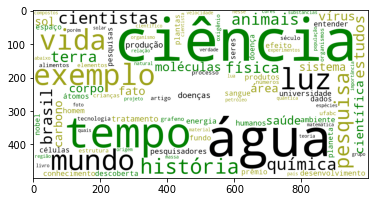

In [41]:
mask = cv2.imread("../Imagens/logo.png")

colormap = ListedColormap(['green','#9DA219','black'])
cloud = WordCloud(background_color='white',
                 colormap=colormap,
                 max_words=100,
                 mask=mask)

cloud.fit_words(frequencies)
plt.imshow(cloud);
cloud.to_file('../Imagens/cloud.pdf');